### Maching Learning vs Deep Learning
- ANN : 인공 신경망, 모든 비선형 함수를 학습
- SLP : 단층 퍼셉트론
- MLP : 다층 퍼셉트론, 1개 이상의 은닉층을 보유, 일반적으로 지도학습(손실함수를 0에 가깝게 함)
- DNN : 심층 신경망, ANN 문제 해결 
- CNN : 합성곱 신경망, 이미지및 비디오 처리에 활용 (특성화 되어 있음)
- RNN : 순환 신경망, 순차 데이터를 처리 (순서를 가지고 있는 데이터) - 언어번역, 시계열 데이터
        CNN 까지는 정방향 계산, 하지만 RNN은 그전의 데이터를 어느정도 유지하고 다음 데이터 처리

- Maching Learning : 특성을 사람이 분석 추출
- Deep Learning : 특성을 컴퓨터가 분석 추출

In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import imdb

# 가장 자주 등장하는 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(
num_words = 500)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# 첫번째 리뷰의 길이
len(train_input[0]) # 첫번째 리뷰가 218 token으로 이루어져 있다.

218

In [4]:
len(train_input[1])

189

In [5]:
# 리뷰의 감정분석 : 긍정(1), 부정(0)
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [6]:
# 검증 세트
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42)

In [7]:
import numpy as np

lengths = np.array([len(x) for x in train_input]) # 훈련데이터에서 리뷰
print(np.mean(lengths), np.median(lengths))
# 평균 : 239 , 중앙값 : 178 - 한쪽에 치운친 느낌이 있다.

239.00925 178.0


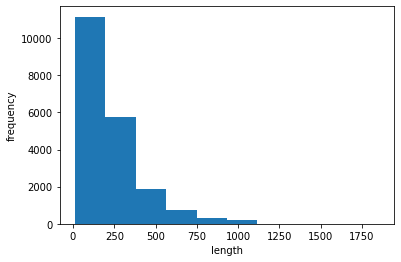

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()
# 대부분 리뷰들이 짧게 만들어 졌다.

- 모든 리뷰의 길이를 100에 맞추기 위해 패딩을 수행한다.
- zero-padding(0으로 채움)

In [9]:
# 시퀀스 데이터의 길이를 맞추는 함수 : pad_sequences()
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
train_seq.shape

(20000, 100)

In [10]:
train_seq[0] # 앞과 뒤에 패딩(0)이 없으니 -> 넘쳐나는 리뷰

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [11]:
train_seq[0][-10:]

array([  6,   2,  46,   7,  14,  20,  10,  10, 470, 158])

In [12]:
train_seq[5] # 패딩 되어 있음 

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2])

In [13]:
val_seq = pad_sequences(val_input, maxlen = 100)

### 순환 신경망 만들기

In [14]:
from tensorflow import keras

model = keras.Sequential()
# input_shape = (100, 500) : 100개씩 끊었음, 500 - 원핫 인코디하여 칸을 500개까지
# 10 ->  0 0 0 0 0 0 0 0 0 0 1 0 .... 500개 (10이니깐 10칸쪽에 1표시)
# 원 핫 인코딩을 통하여 숫자가 큰것을 없애려고 한다.
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [15]:
# 수동으로 할려면 이 함수 사용
train_oh = keras.utils.to_categorical(train_seq) 

print(train_oh.shape)

print(train_oh[0][0][:12])

print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq) 

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [16]:
# 모델 정보 확인
model.summary()
# 4072 : 500(단어-차원) * 8(셀 만들기) + 8*8(자기순환신경망 - 가중치) + 8(절편)
# 9 :  8 * 1 + 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [17]:
# default = 0.001
# 0.0001로 바꾸로 싶어서 별도 객체를 빼낸다
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

# 조기종료
# patience=3 - 3번 연속 향상되지 않으면 종료
# restore_best_weights=True : 가장 낮은 손실값 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

# history라는 딕셔너리 객체 반환 밑의 history 변수라는 건 다름
history = model.fit(train_oh, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 15s 771us/sample - loss: 0.7021 - accuracy: 0.4981 - val_loss: 0.7010 - val_accuracy: 0.5006
Epoch 2/100
20000/20000 [==============================] - 12s 597us/sample - loss: 0.6973 - accuracy: 0.5094 - val_loss: 0.6984 - val_accuracy: 0.4998
Epoch 3/100
20000/20000 [==============================] - 12s 592us/sample - loss: 0.6942 - accuracy: 0.5189 - val_loss: 0.6966 - val_accuracy: 0.5002
Epoch 4/100
20000/20000 [==============================] - 12s 597us/sample - loss: 0.6919 - accuracy: 0.5271 - val_loss: 0.6952 - val_accuracy: 0.5058
Epoch 5/100
20000/20000 [==============================] - 12s 592us/sample - loss: 0.6899 - accuracy: 0.5354 - val_loss: 0.6940 - val_accuracy: 0.5098
Epoch 6/100
20000/20000 [==============================] - 12s 612us/sample - loss: 0.6881 - accuracy: 0.5423 - val_loss: 0.6929 - val_accuracy: 0.5144
Epoch 7/100
20000/20000 [==============

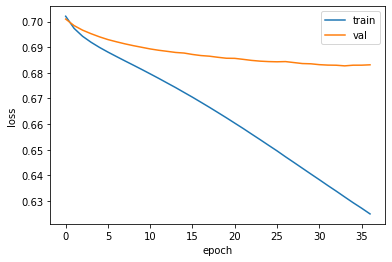

In [18]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# 원-핫 인코딩 -> 많은 기억공간 사용
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 단어 임베딩 처리

In [20]:
# 원-핫인코딩 단점 보완 - 기억공간 줄이기( Embedding )
model2 = keras.Sequential()

# keras.layers.Embedding(500, 16, input_length = 100)
# 500 - 사용할 단어수, 16 - 임베딩 크기 (원-핫인코딩보다 작음),
# input_length = 100 : 입력한 샘플들의 길이는 100으로 맞춤
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [22]:
# default = 0.001
# 0.0001로 바꾸로 싶어서 별고 객체를 빼낸다
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

# 조기종료
# patience=3 - 손실율이 3번 이상 내려가지 않을때 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

# history라는 딕셔너리 객체 반환 밑의 history 변수라는 건 다름
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 7s 349us/sample - loss: 0.6948 - accuracy: 0.5084 - val_loss: 0.6915 - val_accuracy: 0.5184
Epoch 2/100
20000/20000 [==============================] - 5s 269us/sample - loss: 0.6894 - accuracy: 0.5375 - val_loss: 0.6881 - val_accuracy: 0.5470
Epoch 3/100
20000/20000 [==============================] - 5s 268us/sample - loss: 0.6845 - accuracy: 0.5655 - val_loss: 0.6839 - val_accuracy: 0.5664
Epoch 4/100
20000/20000 [==============================] - 5s 273us/sample - loss: 0.6776 - accuracy: 0.5950 - val_loss: 0.6758 - val_accuracy: 0.5930
Epoch 5/100
20000/20000 [==============================] - 6s 279us/sample - loss: 0.6537 - accuracy: 0.6392 - val_loss: 0.6068 - val_accuracy: 0.6974
Epoch 6/100
20000/20000 [==============================] - 5s 274us/sample - loss: 0.5879 - accuracy: 0.7147 - val_loss: 0.5745 - val_accuracy: 0.7254
Epoch 7/100
20000/20000 [====================

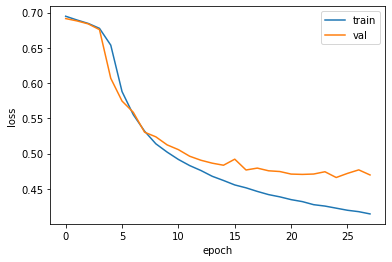

In [23]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()